# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_disease_predictor.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

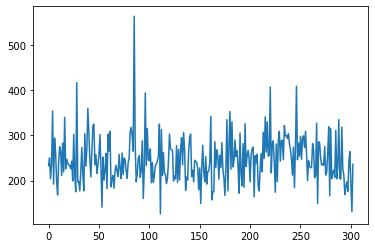

In [4]:
df.chol.plot()

<AxesSubplot:xlabel='oldpeak'>

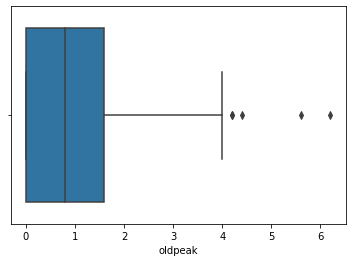

In [5]:
sns.boxplot(x='oldpeak',data=df)


# Removing outliers from data using IQR method

In [6]:
def remove_outliers(df,x):
    q25, q75= np.percentile(df[x],25),np.percentile(df[x],75)
    iqr = q75 - q25
    cut_off= iqr*1.5
    lower, upper = 1 , (q75 + cut_off)
    df= df[(df[x]< upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return df

In [7]:
df= remove_outliers(df,'chol')
df= remove_outliers(df,'oldpeak')

Outliers of "chol" are removed

Outliers of "oldpeak" are removed



<AxesSubplot:title={'center':'Correlation with target'}>

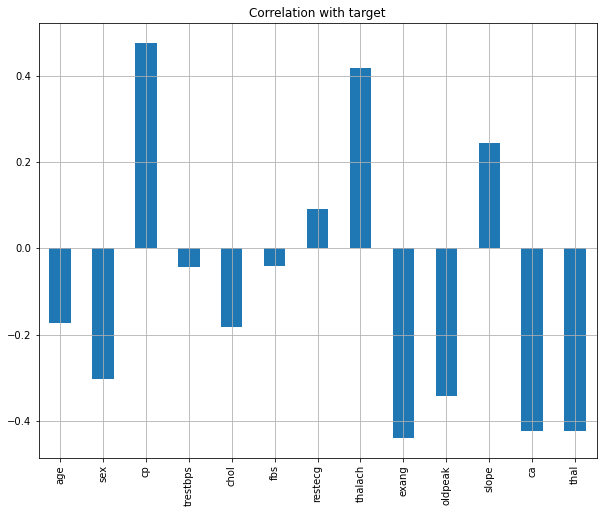

In [8]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(10, 8), title="Correlation with target")
                                                   

# Checking correlation b/w variables using heatmap

<AxesSubplot:>

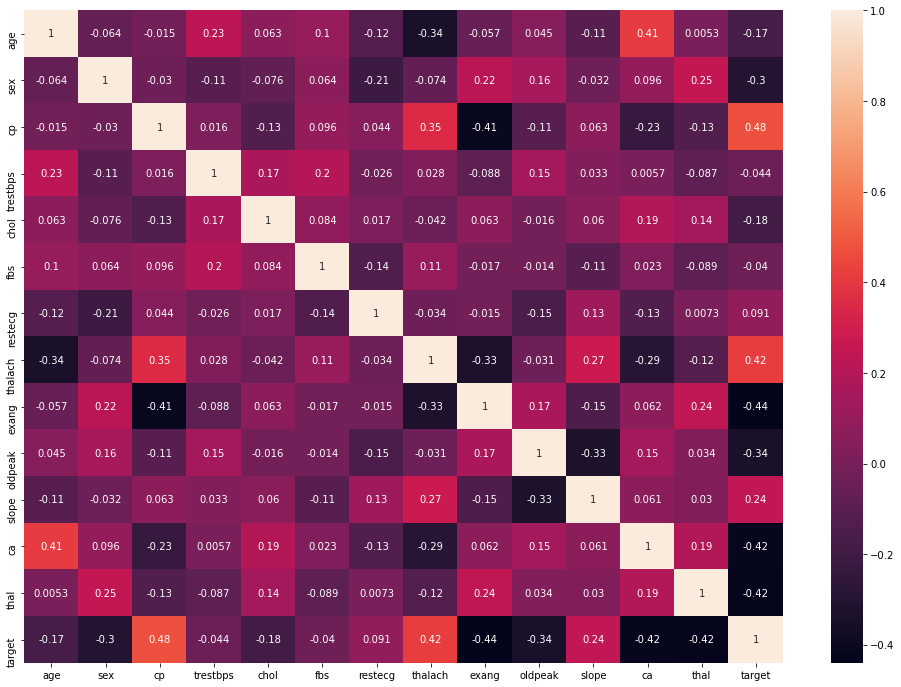

In [9]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)

In [10]:
df.drop('fbs',axis=1,inplace=True) 
df.drop('trestbps',axis=1,inplace=True) 
df['chol'] = np.log(df['chol'])#removing skewness

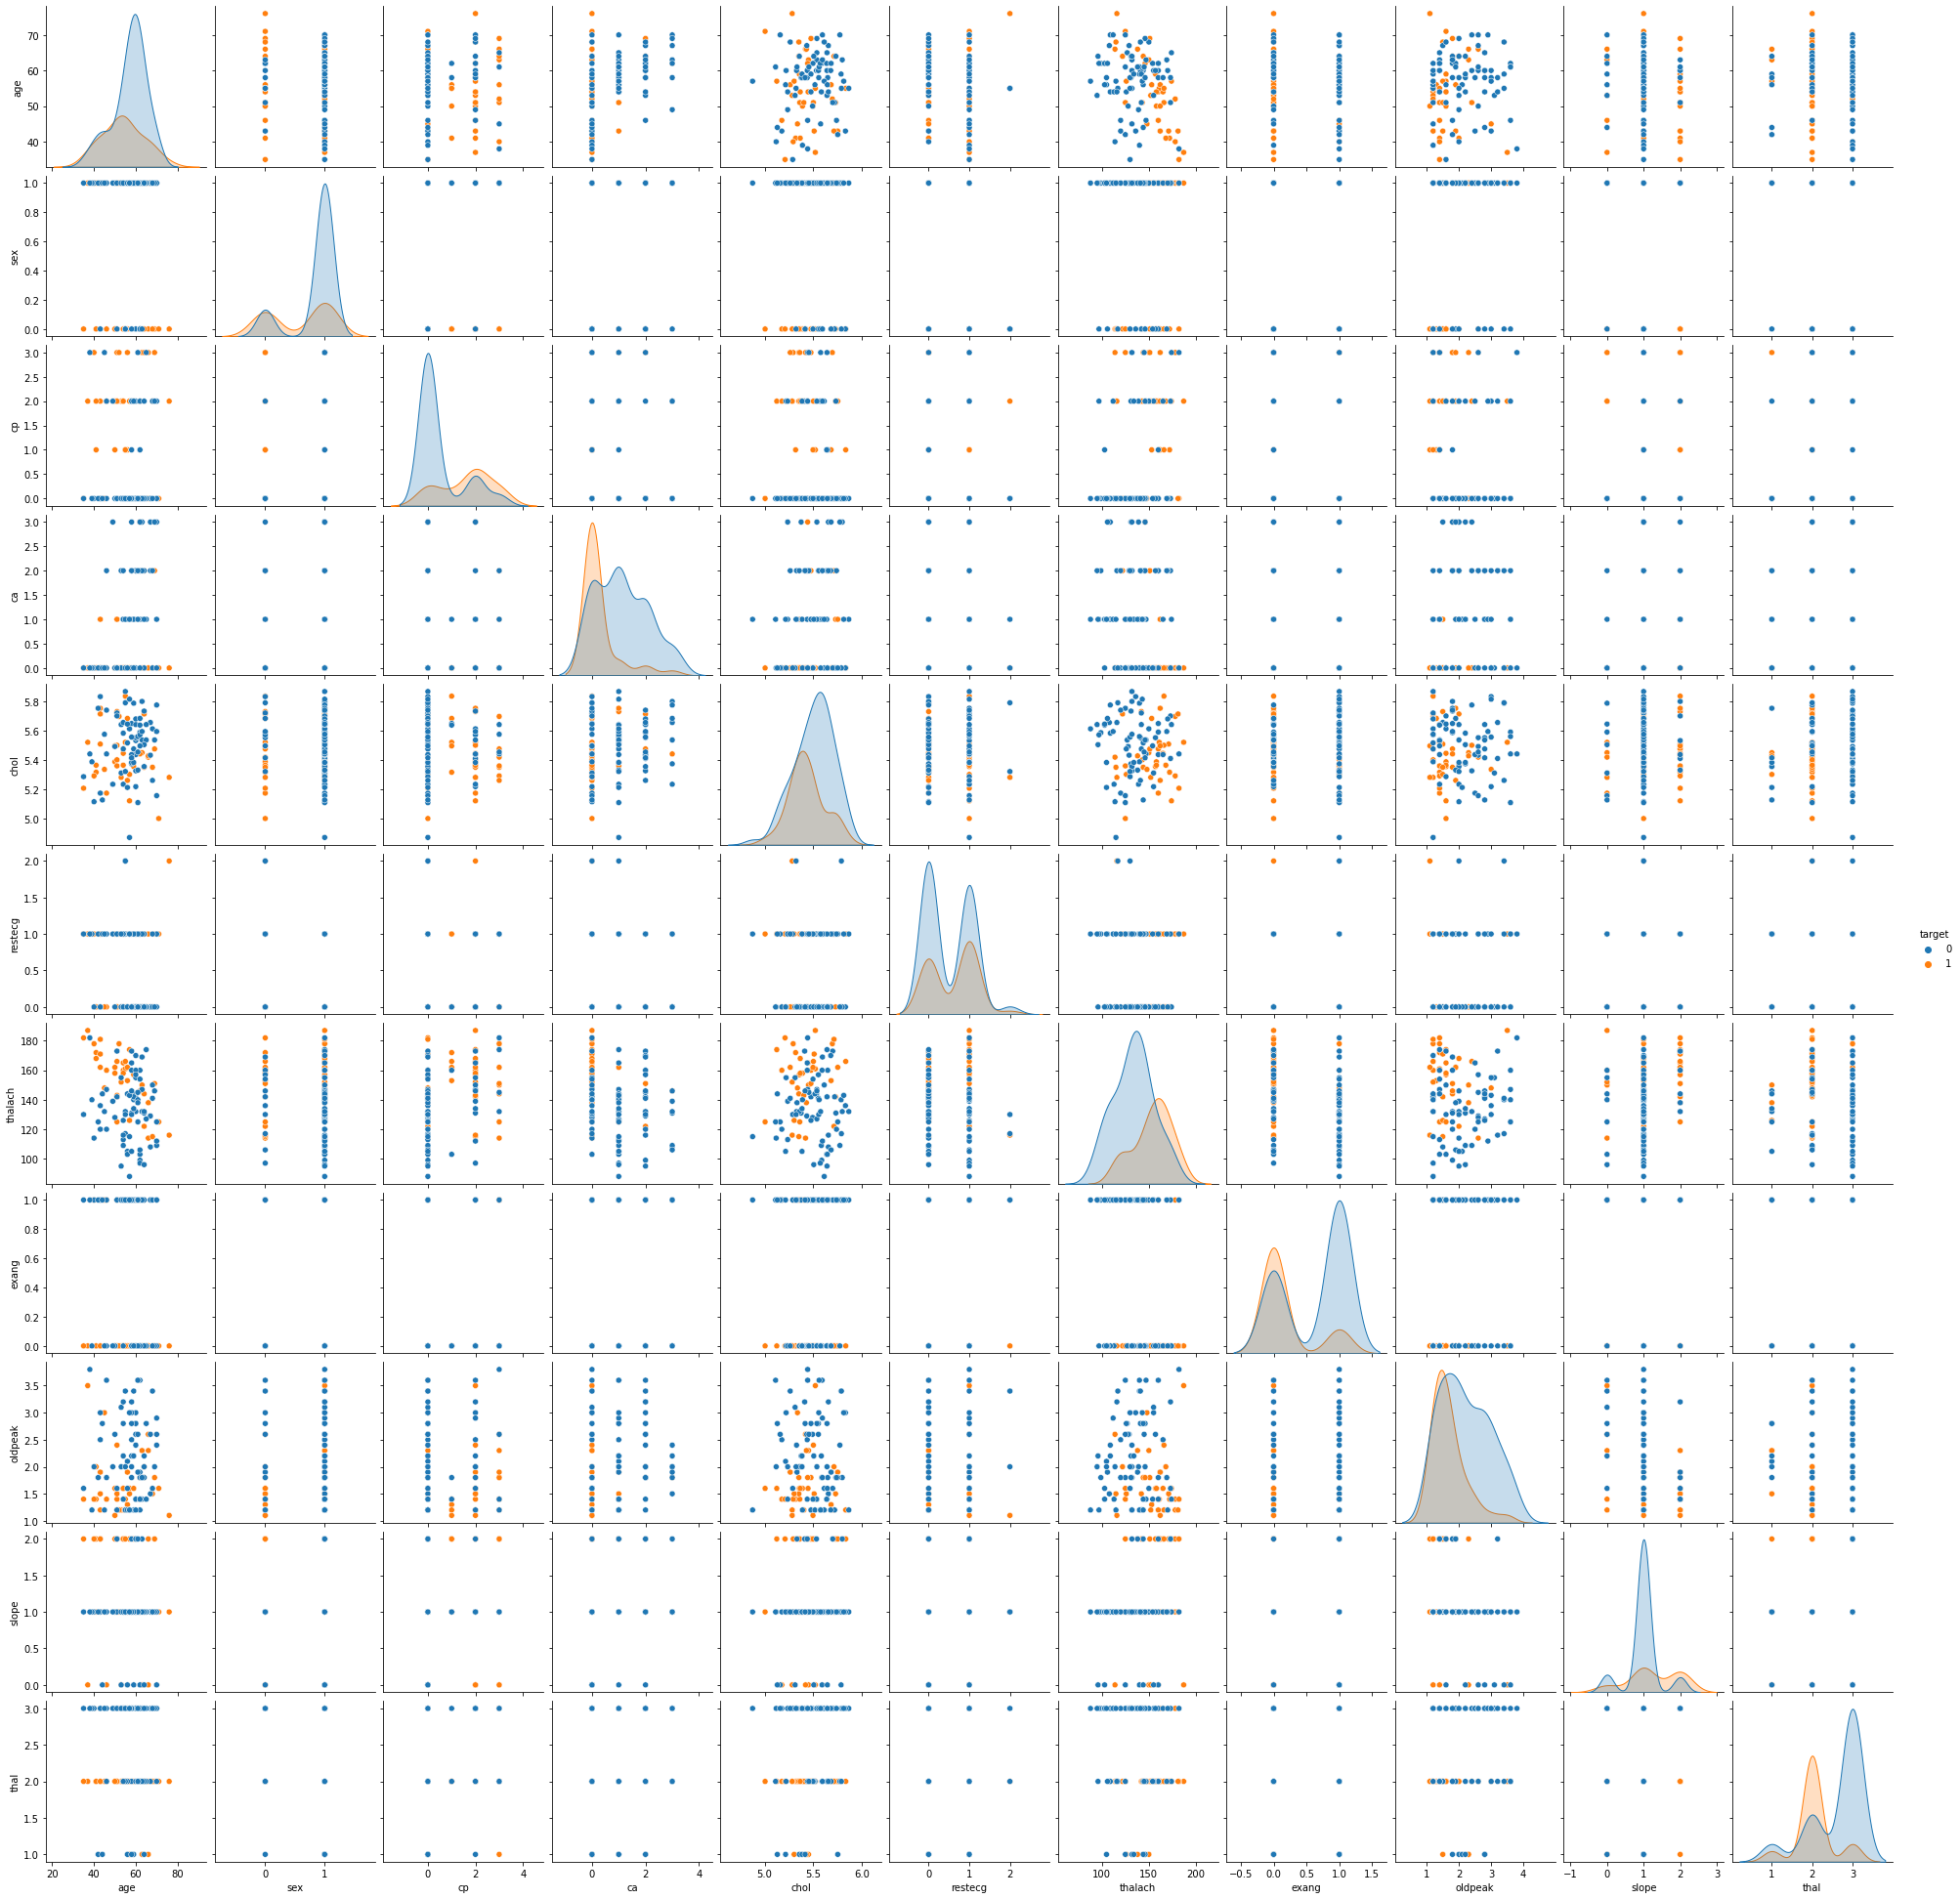

In [11]:
sns.pairplot(df,hue='target',vars=['age','sex','cp','ca','chol','restecg','thalach','exang','oldpeak','slope','thal'])

In [12]:
X=df.drop('target',axis=1)
y= df.target
X.head()


,age,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,5.451038,0,150,0,2.3,0,0,1
1,37,1,2,5.521461,1,187,0,3.5,0,0,2
2,41,0,1,5.318120,0,172,0,1.4,2,0,2
6,56,0,1,5.683580,0,153,0,1.3,1,0,2
9,57,1,2,5.123964,1,174,0,1.6,2,0,2


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)


In [14]:
x_train

,age,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
234,70,1,0,5.774552,0,109,0,2.4,1,3,2
226,62,1,1,5.638355,0,103,0,1.4,1,1,3
35,46,0,2,5.176150,0,160,1,1.4,0,0,2
117,56,1,3,5.262690,0,162,0,1.9,1,0,3
174,60,1,0,5.327876,0,132,1,2.4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,5.323010,2,130,1,2.0,1,1,3
34,51,1,3,5.361292,0,125,1,1.4,2,1,2
259,38,1,3,5.442418,1,182,1,3.8,1,0,3
184,50,1,0,5.493061,0,128,0,2.6,1,0,3


In [15]:
y_train

234    0
226    0
35     1
117    1
174    0
      ..
289    0
34     1
259    0
184    0
282    0
Name: target, Length: 84, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [17]:
from sklearn.svm import SVC
from sklearn import metrics
svc= SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
print("Accuracy Score : ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score : 
0.9285714285714286


In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.80      0.89        10

    accuracy                           0.93        28
   macro avg       0.95      0.90      0.92        28
weighted avg       0.94      0.93      0.93        28



In [19]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC')
    plt.plot([0,1],[0,1],color='blue',label='Mean Line',linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()
 

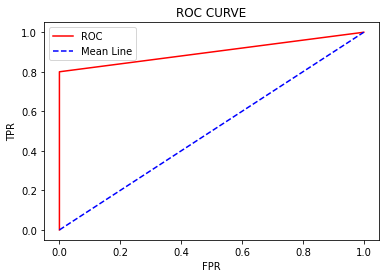

In [20]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test,y_pred)
plot_roc_curve(fpr,tpr)

In [21]:
auc(fpr,tpr)

0.9

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score 

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.8928571428571429


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.89      0.80      0.84        10

    accuracy                           0.89        28
   macro avg       0.89      0.87      0.88        28
weighted avg       0.89      0.89      0.89        28

